In [76]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt,joblib
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import AdaBoostRegressor
#Optimization
from sklearn.model_selection import GridSearchCV
#Metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [77]:
sal=pd.read_csv('MNC_Salaries.csv',parse_dates=False)

In [78]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   DOJ       457 non-null    object 
 6   Weight    457 non-null    int64  
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [79]:
sal.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [80]:
sal.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


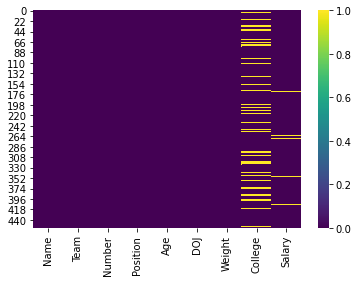

In [81]:
sns.heatmap(sal.isna(),cmap='viridis')

In [82]:
sal.shape

(457, 9)

In [83]:
sal.dropna(subset=['Salary'],inplace=True)

In [84]:
sal.shape

(446, 9)

In [85]:
sal.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
5,Amir Johnson,Boston Celtics,90,PF,29,06-Sep,240,NaN,12000000.0


In [86]:
si=SimpleImputer(strategy='most_frequent')

In [87]:
sal['College']=si.fit_transform(sal['College'].values.reshape(-1,1))

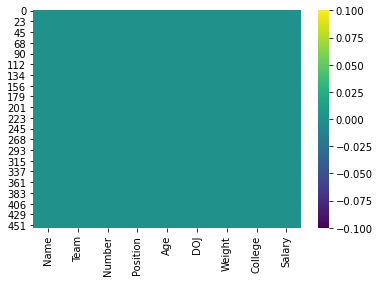

In [88]:
sns.heatmap(sal.isna(),cmap='viridis')

In [89]:
sal.drop('Name',axis=1,inplace=True)

In [90]:
sal.head()

,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
3,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Boston Celtics,8,PF,29,06-Oct,231,Kentucky,5000000.0
5,Boston Celtics,90,PF,29,06-Sep,240,Kentucky,12000000.0


In [91]:
le=LabelEncoder()

In [92]:
sal['Team']=le.fit_transform(sal['Team'])

In [93]:
sal.head()

,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,1,0,PG,25,06-Feb,180,Texas,7730337.0
1,1,99,SF,25,06-Jun,235,Marquette,6796117.0
3,1,28,SG,22,06-May,185,Georgia State,1148640.0
4,1,8,PF,29,06-Oct,231,Kentucky,5000000.0
5,1,90,PF,29,06-Sep,240,Kentucky,12000000.0


In [94]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 0 to 456
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Team      446 non-null    int64  
 1   Number    446 non-null    int64  
 2   Position  446 non-null    object 
 3   Age       446 non-null    int64  
 4   DOJ       446 non-null    object 
 5   Weight    446 non-null    int64  
 6   College   446 non-null    object 
 7   Salary    446 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 31.4+ KB


In [99]:
sal.drop('DOJ',axis=1,inplace=True)

In [101]:
sal.head()

,Team,Number,Position,Age,Weight,College,Salary
0,1,0,PG,25,180,Texas,7730337.0
1,1,99,SF,25,235,Marquette,6796117.0
3,1,28,SG,22,185,Georgia State,1148640.0
4,1,8,PF,29,231,Kentucky,5000000.0
5,1,90,PF,29,240,Kentucky,12000000.0


In [102]:
sal['Position']=le.fit_transform(sal['Position'])

In [104]:
sal.head()

,Team,Number,Position,Age,Weight,College,Salary
0,1,0,2,25,180,Texas,7730337.0
1,1,99,3,25,235,Marquette,6796117.0
3,1,28,4,22,185,Georgia State,1148640.0
4,1,8,1,29,231,Kentucky,5000000.0
5,1,90,1,29,240,Kentucky,12000000.0


In [105]:
sal['College']=le.fit_transform(sal['College'])

In [107]:
sal.head()

,Team,Number,Position,Age,Weight,College,Salary
0,1,0,2,25,180,90,7730337.0
1,1,99,3,25,235,50,6796117.0
3,1,28,4,22,185,31,1148640.0
4,1,8,1,29,231,43,5000000.0
5,1,90,1,29,240,43,12000000.0


In [109]:
sal.skew()

Team       -0.012790
Number      1.682517
Position   -0.014572
Age         0.620299
Weight      0.117417
College     0.277310
Salary      1.576321
dtype: float64

In [110]:
for x in sal.columns:
    if abs(sal.loc[:,x].skew())>0.55:
        sal.loc[:,x]=np.log1p(sal.loc[:,x])

In [111]:
sal.skew()

Team       -0.012790
Number     -0.641464
Position   -0.014572
Age         0.277062
Weight      0.117417
College     0.277310
Salary     -0.415144
dtype: float64

In [112]:
sc=StandardScaler()

In [113]:
sal_scale=sc.fit_transform(sal)

In [114]:
sal_scale

array([[-1.5694227 , -2.44425333, -0.04610423, ..., -1.59799727,
         1.26599344,  0.89232178],
       [-1.5694227 ,  2.044552  ,  0.66294702, ...,  0.50697927,
        -0.11225291,  0.78569314],
       [-1.5694227 ,  0.83795663,  1.37199827, ..., -1.40663577,
        -0.76691993, -0.68604524],
       ...,
       [ 1.55334468,  0.73151662, -0.04610423, ..., -1.63626958,
        -0.35344602, -0.88799141],
       [ 1.55334468,  0.56868371, -1.46420673, ...,  1.31069758,
        -0.35344602,  0.08065788],
       [ 1.55334468,  0.69328695, -1.46420673, ...,  0.35389006,
        -0.42235834, -0.84560879]])

In [115]:
sal=pd.DataFrame(sal_scale,columns=sal.columns)

In [117]:
sal.head()

,Team,Number,Position,Age,Weight,College,Salary
0,-1.569423,-2.444253,-0.046104,-0.385356,-1.597997,1.265993,0.892322
1,-1.569423,2.044552,0.662947,-0.385356,0.506979,-0.112253,0.785693
2,-1.569423,0.837957,1.371998,-1.182794,-1.406636,-0.766920,-0.686045
3,-1.569423,-0.302549,-0.755155,0.545410,0.353890,-0.353446,0.531613
4,-1.569423,1.952624,-0.755155,0.545410,0.698341,-0.353446,1.256375


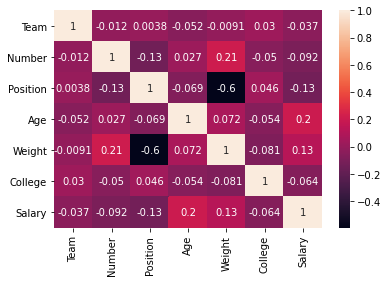

In [137]:
sns.heatmap(sal.corr(),annot=True)

In [119]:
sal.skew()

Team       -0.012790
Number     -0.641464
Position   -0.014572
Age         0.277062
Weight      0.117417
College     0.277310
Salary     -0.415144
dtype: float64

In [120]:
sal.shape

(446, 7)

In [121]:
zs=zscore(sal)
sal=sal[(zs<3).all(axis=1)]

In [122]:
sal.shape

(445, 7)

In [126]:
X=sal.drop('Salary',axis=1)
y=sal.loc[:,'Salary']

In [130]:
def model(mod):
    max_score=0
    max_random_state=0
    for x in range (42,102):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        md=mod()
        md.fit(X_train,y_train)
        md_predict=md.predict(X_test)
        r2score=r2_score(y_test,md_predict)
        if max_score<r2score:
            max_score=r2score
            max_random_state=x
    print("Max score is {} at {} random state".format(max_score,max_random_state))

In [131]:
model(LinearRegression)

Max score is 0.12202773361770158 at 89 random state


In [132]:
model(AdaBoostRegressor)

Max score is 0.10481088507918968 at 100 random state


In [133]:
model(KernelRidge)

Max score is 0.12327841065056133 at 89 random state


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=89)
md=LinearRegression()
md.fit(X_train,y_train)
md_predict=md.predict(X_test)

In [138]:
MSE=mean_squared_error(y_test,md_predict)
MSE

0.8883037814642837

In [139]:
joblib.dump(md,'LinearReg_Salary.joblib')

['LinearReg_Salary.joblib']